In [11]:
from langgraph.graph import StateGraph,START,END,add_messages
from langchain_aws import ChatBedrock, BedrockEmbeddings
from langchain_core.messages import HumanMessage
from langchain.prompts import ChatPromptTemplate,MessagesPlaceholder
from typing import Annotated,TypedDict

In [12]:
class MyState(TypedDict):
    messages:str = Annotated[list,add_messages]

In [97]:
#the nodes
def ques_rephrase_node(MyState) -> MyState:
    return "hi"

def decider_node(MyState):
    return "hi"

def retriever(MyState) -> MyState:
    return "hi"

def generate_answer_node(MyState):
    return "hi"

def rephrase_answer_node(MyState) -> MyState:
    return "hi"

def rephrase_context_node(MyState) -> MyState:
    return "hi"
def no_answer_node(MyState) -> MyState:
    return "hi"
def default_node(MyState) -> MyState:
    return "hi"

def decider_node(MyState):
    msg = MyState.get("messages","")
    if msg =="yo":
        return "retrieve kro"
    else:
        return "no"

def should_rephrase(MyState):
    msg = MyState.get("messages","")
    if msg =="":
        return "rephrase kro"
    else:
        return "no need to rephrase"
    
def retriever(MyState)->MyState:
    msg =MyState.get("messages")
    if msg =="yes":
        return "generate answer"
    if msg == "rephrase_context":
        return "rephrase_context"
    if msg == "irrelevant":
        return "irrelevent"

In [98]:
#creation of graph
graph_builder = StateGraph(MyState)
graph_builder.add_node("rephrase_question",ques_rephrase_node)
graph_builder.add_node("decider_node",decider_node)
graph_builder.add_node("retrieval_tool",retriever)
graph_builder.add_node("generate_answer",generate_answer_node)
graph_builder.add_node("rephrase_context",rephrase_context_node)
graph_builder.add_node("noanswer",no_answer_node)
graph_builder.add_node("default",default_node)

graph_builder.add_edge(START,"rephrase_question")
# graph_builder.add_edge("rephrase_question","decider_node")
graph_builder.add_conditional_edges("rephrase_question",should_rephrase,{
    "rephrase_kro":"rephrase_question",
    "no need to rephrase":"decider_node"
})
# graph_builder.add_edge("rephrase_question","rephrase_context")
# graph_builder.set_entry_point(START)
graph_builder.add_conditional_edges("decider_node",decider_node,{
    "retrieve kro":"retrieval_tool",
    "no":"default"
})
graph_builder.add_edge("decider_node","retrieval_tool")
graph_builder.add_conditional_edges("retrieval_tool",retriever,{
    "generate_answer":"generate_answer",
    "rephrase_context":"rephrase_context",
    "irrelevent":"noanswer"
})
graph_builder.add_edge("rephrase_context","retrieval_tool")
graph_builder.add_edge("decider_node","default")
graph_builder.add_edge("default",END)
graph_builder.add_edge("retrieval_tool",END)

In [99]:
graph = graph_builder.compile()

In [100]:
from IPython.display import display, Image

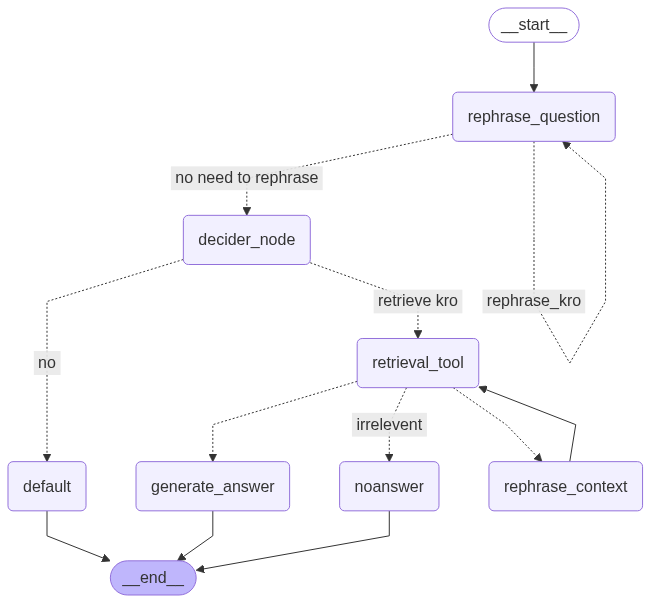

In [101]:
display(Image(graph.get_graph().draw_mermaid_png()))